### Final Exam

### Clasification 

#### Importing the needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import random
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, f1_score,roc_auc_score,accuracy_score,classification_report,confusion_matrix,mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

## Answer 1

#### Load the data set exam_1_classification into "data"

In [2]:
data = pd.read_csv("exam_1_classification.csv")

#### Brief view of top few records

In [3]:
data.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,y
0,0.878396,10.781308,-0.945368,-0.749967,0.174117,4.213844,3.256131,1.747960,0.637369,0.895365,...,-5.530880,-1.085522,2.197708,-14.659071,7.975020,0.641365,-2.381690,-1.296122,2.718700,0
1,0.004703,0.004063,0.239743,-0.746037,-1.643112,-2.700096,0.481805,-0.827984,2.425517,-2.978290,...,-1.196145,1.486952,-0.984622,2.251100,-1.311260,-1.360329,0.216767,0.793985,-1.094206,0
2,1.300928,-5.272156,-2.140847,-2.209105,-0.544995,1.477861,3.206408,-1.131390,-3.161896,1.712217,...,3.316508,1.129793,-7.432333,11.023547,-2.158989,-0.481151,7.556961,1.505347,-8.704136,1
3,0.176676,0.379093,0.379983,-1.510225,-0.113457,1.295986,2.488324,1.340153,-0.777143,3.004764,...,2.710009,-5.879425,-1.809712,7.064204,-0.724669,1.045550,-0.319549,4.960117,10.630263,1
4,0.840204,-1.175762,-0.431576,2.836433,1.020046,0.330592,3.923244,-0.366859,-2.979769,2.683751,...,-0.775314,1.497336,-1.368875,-1.845289,3.516078,-1.068080,1.793182,-1.340107,-7.356670,1


The data appear to be standardized and the target labels are 0 or 1

#### Split the "data" into X- explanatory variables and Y-target feature

In [4]:
X = data.drop(columns=['y'])
Y = data.y

In [5]:
X

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19
0,0.878396,10.781308,-0.945368,-0.749967,0.174117,4.213844,3.256131,1.747960,0.637369,0.895365,1.158788,-5.530880,-1.085522,2.197708,-14.659071,7.975020,0.641365,-2.381690,-1.296122,2.718700
1,0.004703,0.004063,0.239743,-0.746037,-1.643112,-2.700096,0.481805,-0.827984,2.425517,-2.978290,-0.153856,-1.196145,1.486952,-0.984622,2.251100,-1.311260,-1.360329,0.216767,0.793985,-1.094206
2,1.300928,-5.272156,-2.140847,-2.209105,-0.544995,1.477861,3.206408,-1.131390,-3.161896,1.712217,0.896514,3.316508,1.129793,-7.432333,11.023547,-2.158989,-0.481151,7.556961,1.505347,-8.704136
3,0.176676,0.379093,0.379983,-1.510225,-0.113457,1.295986,2.488324,1.340153,-0.777143,3.004764,-0.879530,2.710009,-5.879425,-1.809712,7.064204,-0.724669,1.045550,-0.319549,4.960117,10.630263
4,0.840204,-1.175762,-0.431576,2.836433,1.020046,0.330592,3.923244,-0.366859,-2.979769,2.683751,-1.334537,-0.775314,1.497336,-1.368875,-1.845289,3.516078,-1.068080,1.793182,-1.340107,-7.356670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.389474,3.449917,0.011536,-2.061789,-0.333034,2.367926,-1.804085,-0.053321,0.178154,-1.466303,-0.288238,-1.732671,-1.818311,0.362678,-2.118729,0.134583,1.245921,0.472815,0.625394,0.917012
9996,-0.872586,0.241332,-1.055799,-1.966629,1.083916,-1.969005,-0.048014,-0.196637,-0.218209,4.076696,1.374788,4.025984,-4.580127,-2.412662,10.294297,-2.085765,0.573666,0.257046,0.994980,7.197811
9997,0.412388,0.139148,0.139280,-1.573894,1.389947,0.172883,-1.332859,-0.067980,1.591418,-1.695460,0.800899,0.255114,-1.449319,-2.080074,2.954922,0.472429,0.554229,1.520341,0.998670,0.153579
9998,1.676835,-0.036261,-0.246196,-4.368508,1.239638,-2.230944,-3.894008,-2.718614,-0.080125,-0.064357,-1.143237,2.947710,-2.395601,-4.127714,14.087802,-7.637651,0.152329,-1.623591,-1.253764,3.085239


In [6]:
Y

0       0
1       0
2       1
3       1
4       1
       ..
9995    0
9996    1
9997    0
9998    1
9999    0
Name: y, Length: 10000, dtype: int64

## Answer 2

#### Splitting the X and Y of "data" into 80% training and 20% test data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True,random_state=0)

In [9]:
from sklearn.tree import DecisionTreeClassifier

#### Training the Decision Tree Classifier Model with random_state = 0 and deafult parameters

In [10]:
dtc = DecisionTreeClassifier(random_state=0)


In [11]:
dtc.fit(X_train,Y_train)
y_pred_train = dtc.predict(X_train)
y_unconst = dtc.predict(X_test)
y_unconst


array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

#### Displaying the Confusion matrix for train dataset

[[3997    0]
 [   0 4003]]


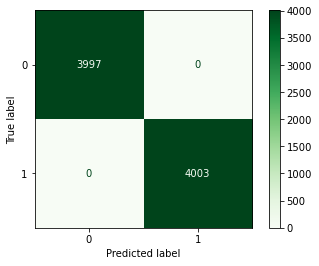

In [12]:
disp_train = ConfusionMatrixDisplay.from_estimator(
        dtc,
        X_train,
        Y_train,
        cmap=plt.cm.Greens)

print(disp_train.confusion_matrix)

#### Classification Report for train dataset

In [13]:
print(classification_report(Y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3997
           1       1.00      1.00      1.00      4003

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



#### Summary of metrics on the train dataset

In [14]:
result_train = pd.DataFrame({"Gradient Boosting with default parameters":[accuracy_score(Y_train, y_pred_train),
                                                                  precision_score(Y_train, y_pred_train),
                                                                  recall_score(Y_train, y_pred_train)]},index =['Accuracy Score','Precision Score','Recall Score'])
                                                                                                        
result_train

,Gradient Boosting with default parameters
Accuracy Score,1.0
Precision Score,1.0
Recall Score,1.0


#### Displaying the Confusion matrix for test dataset

[[877 132]
 [144 847]]


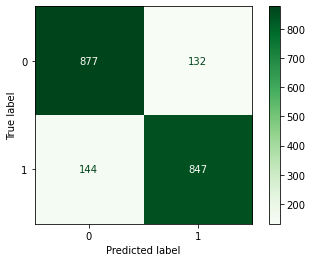

In [15]:
disp_test = ConfusionMatrixDisplay.from_estimator(
        dtc,
        X_test,
        Y_test,
        cmap=plt.cm.Greens)

print(disp_test.confusion_matrix)

#### Classification Report for test dataset

In [16]:
print(classification_report(Y_test, y_unconst))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1009
           1       0.87      0.85      0.86       991

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



#### Summary of metrics on the test dataset

In [17]:
result_test = pd.DataFrame({"Gradient Boosting with default parameters":[accuracy_score(Y_test, y_unconst),
                                                                  precision_score(Y_test, y_unconst),
                                                                  recall_score(Y_test, y_unconst)]},index =['Accuracy Score','Precision Score','Recall Score'])
                                                                                                        
result_test

,Gradient Boosting with default parameters
Accuracy Score,0.862000
Precision Score,0.865169
Recall Score,0.854692


Reasons for low performance (accuracy score of 0.86 on test data set compared to an accuracy score of 1.0 on training data set) are as follows:

1 . The distribution of data in the test set is very different from the one of the training set

2 . The  Decision Tree Classifier model is optimized for the train data set

## Answer 3

Choosing the metrics max_depth =4 , ccp_alpha = 0.015, criterion = entropy

In [18]:
dtc_tuned = DecisionTreeClassifier(random_state=0, 
                             criterion="entropy",
                             max_depth=4,
                             ccp_alpha=0.015)


In [19]:
dtc_tuned.fit(X_train,Y_train)
y_predn_train = dtc_tuned.predict(X_train)
y_predn_test = dtc_tuned.predict(X_test)


Confusion matrix on train dataset

[[3409  588]
 [ 661 3342]]


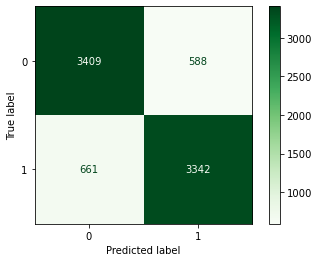

In [20]:
disp_train_tuned = ConfusionMatrixDisplay.from_estimator(
        dtc_tuned,
        X_train,
        Y_train,
        cmap=plt.cm.Greens)

print(disp_train_tuned.confusion_matrix)

Classification report on train dataset

In [21]:
print(classification_report(Y_train, y_predn_train))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      3997
           1       0.85      0.83      0.84      4003

    accuracy                           0.84      8000
   macro avg       0.84      0.84      0.84      8000
weighted avg       0.84      0.84      0.84      8000



Summary of metrics on train dataset

In [22]:
result_train_tuned = pd.DataFrame({"Gradient Boosting with default parameters":[accuracy_score(Y_train, y_predn_train),
                                                                  precision_score(Y_train, y_predn_train),
                                                                  recall_score(Y_train, y_predn_train)]},index =['Accuracy Score','Precision Score','Recall Score'])
                                                                                                        
result_train_tuned

,Gradient Boosting with default parameters
Accuracy Score,0.843875
Precision Score,0.850382
Recall Score,0.834874


Confusion matrix on test dataset

[[871 138]
 [183 808]]


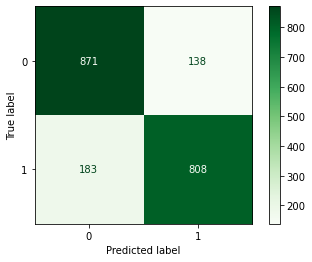

In [23]:
disp_test_tuned = ConfusionMatrixDisplay.from_estimator(
        dtc_tuned,
        X_test,
        Y_test,
        cmap=plt.cm.Greens)

print(disp_test_tuned.confusion_matrix)

Classification report on test dataset

In [24]:
print(classification_report(Y_test, y_predn_test))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1009
           1       0.85      0.82      0.83       991

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



Summary of metrics on test dataset

In [25]:
result_test_tuned = pd.DataFrame({"Gradient Boosting with default parameters":[accuracy_score(Y_test, y_predn_test),
                                                                  precision_score(Y_test, y_predn_test),
                                                                  recall_score(Y_test, y_predn_test)]},index =['Accuracy Score','Precision Score','Recall Score'])
                                                                                                        
result_test_tuned

,Gradient Boosting with default parameters
Accuracy Score,0.839500
Precision Score,0.854123
Recall Score,0.815338


Reason for choosing the above parameters :

The parameters Criterion=Entropy, ccp_alpha = 0.015 and max_depth = 4 helped to provide accuracy of 0.84 on test data set . The accuracy on train is also around 0.84. The model is not overfitting on the train data.

Possible Reasons:

1 . Entropy measure is the impurity measure -splits a node such that it gives the most amount of information gain. 

2 . Setting the max_depth = 4 will limit the tree growth .If max_depth = None, the tree will capture more information about the data causes overfitting. It will not generalize well on test set.

3. ccp_alpha = 0.015, will maximize the test accuracy

## Regression

## Answer 4

Load the regrssion data 

In [26]:
task = pd.read_csv("exam_1_regression.csv")

In [27]:
task.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Xt and Yt are the explanatory and target variables respectively

In [28]:
Xt = task.drop(columns=['y'])
Yt = task.y

Splitting the data into 80% tarining and 20% test at random_state = 0

In [29]:
X_tr, X_tst, Y_tr, Y_tst = train_test_split(Xt, Yt, test_size=0.2, shuffle=True,random_state=0)

Fitting the linear regression model

In [30]:
linreg = LinearRegression()

linreg.fit(X_tr,Y_tr)
prediction_train = linreg.predict(X_tr)
prediction_tst = linreg.predict(X_tst)


## Answer 5

Summary of metrics on training data

In [31]:
result_linreg_tr = pd.DataFrame({"Gradient Boosting with default parameters":[r2_score(Y_tr, prediction_train),
                                                                  mean_absolute_error(Y_tr, prediction_train),
                                                                  mean_squared_error(Y_tr, prediction_train)]},index =['R-Squared','Mean Absolute Error','MSE'])
                                                                                                        
result_linreg_tr

,Gradient Boosting with default parameters
R-Squared,0.608897
Mean Absolute Error,0.530874
MSE,0.523441


Summary of metrics on test data

In [32]:
result_linreg_tst = pd.DataFrame({"Gradient Boosting with default parameters":[r2_score(Y_tst, prediction_tst),
                                                                  mean_absolute_error(Y_tst, prediction_tst),
                                                                  mean_squared_error(Y_tst, prediction_tst)]},index =['R-Squared','Mean Absolute Error','MSE'])
                                                                                                        
result_linreg_tst

,Gradient Boosting with default parameters
R-Squared,0.594323
Mean Absolute Error,0.535126
MSE,0.528984


The absolute values of coefficients sorted in an order are given below:

In [33]:
np.sort(np.abs(linreg.coef_))

array([7.56192502e-06, 4.74516383e-03, 9.29324337e-03, 9.86433739e-02,
       4.21449336e-01, 4.33333407e-01, 4.34166041e-01, 5.93215487e-01])

## Answer 6

Displaying the coefficients 

In [34]:
linreg.coef_

array([ 4.33333407e-01,  9.29324337e-03, -9.86433739e-02,  5.93215487e-01,
       -7.56192502e-06, -4.74516383e-03, -4.21449336e-01, -4.34166041e-01])

we see that the AveRoooms coefficient is negative (-9.86433739e-02), it implies that on an average as rooms increase, y decreases.

In [41]:
coef_dict = dict(zip(X_tst.columns,linreg.coef_))
sorted_tuples = sorted(coef_dict.items(), key=lambda item: abs(item[1]), reverse=True)
for tup in sorted_tuples:
    print(tup[0]," column coeficient is ", round(tup[1],2))

AveBedrms  column coeficient is  0.59
Longitude  column coeficient is  -0.43
MedInc  column coeficient is  0.43
Latitude  column coeficient is  -0.42
AveRooms  column coeficient is  -0.1
HouseAge  column coeficient is  0.01
AveOccup  column coeficient is  -0.0
Population  column coeficient is  -0.0
